导入实验需要使用的所有包

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from windrose import WindroseAxes
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

D:\anaconda\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
D:\anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\anaconda\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  return lambda func: addendum(docstring.c

导入数据并解析成时间序列，方便以后对时间按不同时间间隔划分

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%dT%H:%M:%S')
data = pd.read_excel('weatherData.xlsx', parse_dates=['DATE'], date_parser=dateparse, index_col='DATE')
data['Unnamed: 1'] = data.index
data.rename(columns={'Unnamed: 1':'DATE'}, inplace=True)
data

,CITY,DATE,DEWP,PRESSURE,TEMPERATURE,WIND-AVG-SPEED,WIND-DIRECTION
DATE,,,,,,,
2010-01-01 01:00:00,MINNEAPOLIS,2010-01-01 01:00:00,-12.1,1019.5,-8.8,4.1,278.0
2010-01-01 02:00:00,MINNEAPOLIS,2010-01-01 02:00:00,-12.2,1019.5,-9.1,4.1,287.0
2010-01-01 03:00:00,MINNEAPOLIS,2010-01-01 03:00:00,-12.3,1019.6,-9.3,4.0,292.0
2010-01-01 04:00:00,MINNEAPOLIS,2010-01-01 04:00:00,-12.5,1019.5,-9.5,4.0,288.0
2010-01-01 05:00:00,MINNEAPOLIS,2010-01-01 05:00:00,-12.6,1019.3,-9.6,4.0,289.0
...,...,...,...,...,...,...,...
2010-12-31 19:00:00,CHICAGO,2010-12-31 19:00:00,-6.6,1019.5,-3.0,4.8,255.0
2010-12-31 20:00:00,CHICAGO,2010-12-31 20:00:00,-6.7,1019.5,-3.2,4.8,254.0
2010-12-31 21:00:00,CHICAGO,2010-12-31 21:00:00,-6.8,1019.5,-3.4,4.8,255.0


查看数据的每一列是否有缺失值

In [3]:
data.isnull().any()

CITY              False
DATE              False
DEWP               True
PRESSURE           True
TEMPERATURE        True
WIND-AVG-SPEED     True
WIND-DIRECTION     True
dtype: bool

查看数据的每一列缺失值的数量

In [4]:
data.isnull().sum()

CITY                0
DATE                0
DEWP              364
PRESSURE          364
TEMPERATURE       364
WIND-AVG-SPEED    364
WIND-DIRECTION    364
dtype: int64

去重显示所有含有缺失值的行

In [5]:
data[data.isnull().values==True].drop_duplicates()

,CITY,DATE,DEWP,PRESSURE,TEMPERATURE,WIND-AVG-SPEED,WIND-DIRECTION
DATE,,,,,,,
2010-01-02,LAS VEGAS,2010-01-02,NaN,NaN,NaN,NaN,NaN
2010-01-03,LAS VEGAS,2010-01-03,NaN,NaN,NaN,NaN,NaN
2010-01-04,LAS VEGAS,2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,LAS VEGAS,2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,LAS VEGAS,2010-01-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-12-27,LAS VEGAS,2010-12-27,NaN,NaN,NaN,NaN,NaN
2010-12-28,LAS VEGAS,2010-12-28,NaN,NaN,NaN,NaN,NaN
2010-12-29,LAS VEGAS,2010-12-29,NaN,NaN,NaN,NaN,NaN


缺失值用插值的方法填充，即用确实时刻的上一时刻和下一时刻的平均值填充

In [6]:
data = data.interpolate(method='time')

确认一遍数据不含缺失值

In [7]:
data.isnull().sum()

CITY              0
DATE              0
DEWP              0
PRESSURE          0
TEMPERATURE       0
WIND-AVG-SPEED    0
WIND-DIRECTION    0
dtype: int64

查看data的整体信息

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70072 entries, 2010-01-01 01:00:00 to 2010-12-31 23:00:00
Data columns (total 7 columns):
CITY              70072 non-null object
DATE              70072 non-null datetime64[ns]
DEWP              70072 non-null float64
PRESSURE          70072 non-null float64
TEMPERATURE       70072 non-null float64
WIND-AVG-SPEED    70072 non-null float64
WIND-DIRECTION    70072 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.3+ MB


查看所有int64和float64类型的数据分布

可视化后发现数据基本都服从正态分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D1F440648>,
      dtype=object)

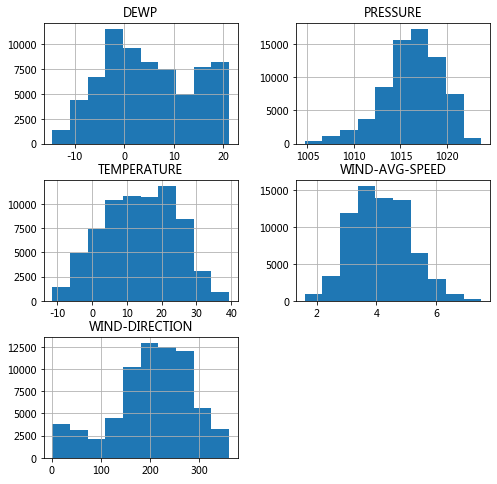

In [9]:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
rcParams['figure.figsize'] = 8, 8
data[quantitative].hist()

导入并查看distance文本

In [10]:
distance = pd.read_table('distance.txt', header=None)
distance

,0
0,MINNEAPOLIS 1269km
1,OKLAHOMA CITY 778km
2,KANSAS CITY 1073km
3,DENVER 1335km
4,NASHVILLE 663km
5,ATLANTA 376km
6,LAS VEGAS 364km
7,CHICAGO 1153km


更改distance列名

In [11]:
distance.columns = ['DISTANCE']
distance

,DISTANCE
0,MINNEAPOLIS 1269km
1,OKLAHOMA CITY 778km
2,KANSAS CITY 1073km
3,DENVER 1335km
4,NASHVILLE 663km
5,ATLANTA 376km
6,LAS VEGAS 364km
7,CHICAGO 1153km


把distance列的距离数值提取出来

In [12]:
distance['DISTANCE'] = distance['DISTANCE'].apply(lambda x : x.strip().split()[-1])
distance

,DISTANCE
0,1269km
1,778km
2,1073km
3,1335km
4,663km
5,376km
6,364km
7,1153km


查看城市的所有类别

In [13]:
data['CITY'].unique()

array(['MINNEAPOLIS', 'OKLAHOMA CITY', 'KANSAS CITY', 'DENVER',
       'NASHVILLE', 'ATLANTA', 'LAS VEGAS', 'CHICAGO '], dtype=object)

将distance的索引改成城市并和其距离对应

In [14]:
distance.index = data['CITY'].unique()
distance

,DISTANCE
MINNEAPOLIS,1269km
OKLAHOMA CITY,778km
KANSAS CITY,1073km
DENVER,1335km
NASHVILLE,663km
ATLANTA,376km
LAS VEGAS,364km
CHICAGO,1153km


查看distance的整体信息

In [15]:
distance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, MINNEAPOLIS to CHICAGO 
Data columns (total 1 columns):
DISTANCE    8 non-null object
dtypes: object(1)
memory usage: 128.0+ bytes


把distance数据框的DISTANCE列改成int型存储，方便以后排序，并合并到data数据框里

In [16]:
distance['CITY'] = distance.index
distance['DISTANCE'] = distance['DISTANCE'].str.extract('((\d){2,})km')
distance['DISTANCE'] = distance['DISTANCE'].astype(int)
data = pd.merge(data, distance, on='CITY')
data = data.set_index('DATE')
data.head(10)

,CITY,DEWP,PRESSURE,TEMPERATURE,WIND-AVG-SPEED,WIND-DIRECTION,DISTANCE
DATE,,,,,,,
2010-01-01 01:00:00,MINNEAPOLIS,-12.1,1019.5,-8.8,4.1,278.0,1269
2010-01-01 02:00:00,MINNEAPOLIS,-12.2,1019.5,-9.1,4.1,287.0,1269
2010-01-01 03:00:00,MINNEAPOLIS,-12.3,1019.6,-9.3,4.0,292.0,1269
2010-01-01 04:00:00,MINNEAPOLIS,-12.5,1019.5,-9.5,4.0,288.0,1269
2010-01-01 05:00:00,MINNEAPOLIS,-12.6,1019.3,-9.6,4.0,289.0,1269
2010-01-01 06:00:00,MINNEAPOLIS,-12.6,1019.4,-9.7,4.0,291.0,1269
2010-01-01 07:00:00,MINNEAPOLIS,-12.7,1019.7,-9.8,4.0,290.0,1269
2010-01-01 08:00:00,MINNEAPOLIS,-12.8,1019.9,-9.8,4.0,292.0,1269
2010-01-01 09:00:00,MINNEAPOLIS,-12.5,1020.2,-9.4,4.2,280.0,1269


考虑到天气和季节的关系比较大，数据框增加一列季节 

0，1，2，3分别代表春，夏，秋，冬四季

In [17]:
data.loc['2010-03-01':'2010-05-31', 'SEASON'] = 0
data.loc['2010-06-01':'2010-08-31', 'SEASON'] = 1
data.loc['2010-09-01':'2010-11-30', 'SEASON'] = 2
data.loc['2010-12-01':'2010-12-31', 'SEASON'] = 3
data.loc['2010-01-01':'2010-02-28', 'SEASON'] = 3

到现在数据基本处理完了

我们来看看清理后的数据

In [18]:
data.head(10)

,CITY,DEWP,PRESSURE,TEMPERATURE,WIND-AVG-SPEED,WIND-DIRECTION,DISTANCE,SEASON
DATE,,,,,,,,
2010-01-01 01:00:00,MINNEAPOLIS,-12.1,1019.5,-8.8,4.1,278.0,1269,3.0
2010-01-01 02:00:00,MINNEAPOLIS,-12.2,1019.5,-9.1,4.1,287.0,1269,3.0
2010-01-01 03:00:00,MINNEAPOLIS,-12.3,1019.6,-9.3,4.0,292.0,1269,3.0
2010-01-01 04:00:00,MINNEAPOLIS,-12.5,1019.5,-9.5,4.0,288.0,1269,3.0
2010-01-01 05:00:00,MINNEAPOLIS,-12.6,1019.3,-9.6,4.0,289.0,1269,3.0
2010-01-01 06:00:00,MINNEAPOLIS,-12.6,1019.4,-9.7,4.0,291.0,1269,3.0
2010-01-01 07:00:00,MINNEAPOLIS,-12.7,1019.7,-9.8,4.0,290.0,1269,3.0
2010-01-01 08:00:00,MINNEAPOLIS,-12.8,1019.9,-9.8,4.0,292.0,1269,3.0
2010-01-01 09:00:00,MINNEAPOLIS,-12.5,1020.2,-9.4,4.2,280.0,1269,3.0


我们开始分析城市气温与海洋距离的关系

先观察一下平均温度和距离关系

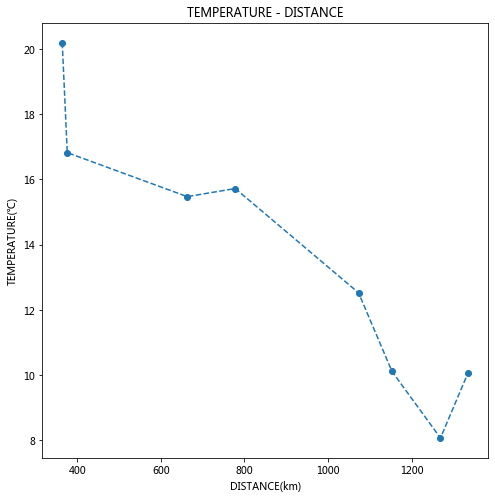

In [19]:
data1 = data.groupby('DISTANCE')['TEMPERATURE'].mean()
plt.figure()
plt.title('TEMPERATURE - DISTANCE')
plt.xlabel('DISTANCE(km)')
plt.ylabel('TEMPERATURE(℃)')
plt.plot(data1, linestyle='dashed', marker='o')

发现平均温度和距离大致呈负线性相关

接下来用箱形图可视化不同季节温度和距海洋距离的关系

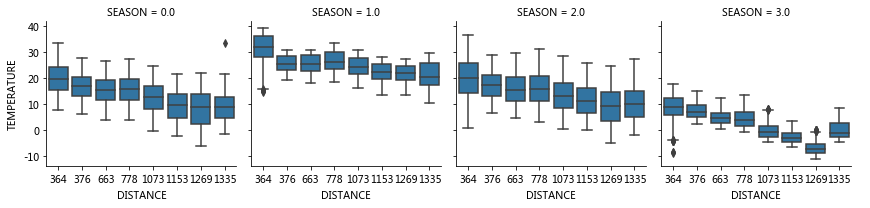

In [20]:
grid = sns.FacetGrid(data, col='SEASON')
grid.map(sns.boxplot, 'DISTANCE', 'TEMPERATURE')
grid.add_legend()

发现除了冬季的DENVER城市温度偏高，春夏秋三季温度和距离都呈严格的负线性相关，即随着与海洋距离增加，温度不断下降

换成折线图进行可视化

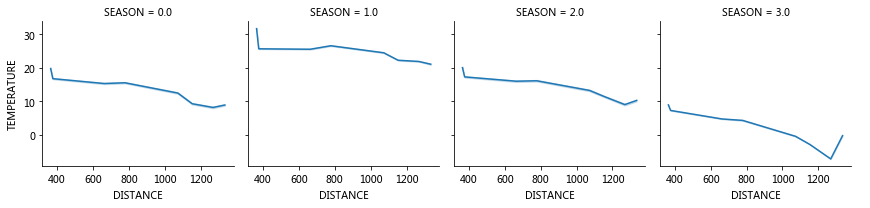

In [21]:
grid = sns.FacetGrid(data, col='SEASON')
grid.map(sns.lineplot, 'DISTANCE', 'TEMPERATURE')
grid.add_legend()

开始分析平均露点和距离的关系

先用折线图可视化平均露点和距离的关系

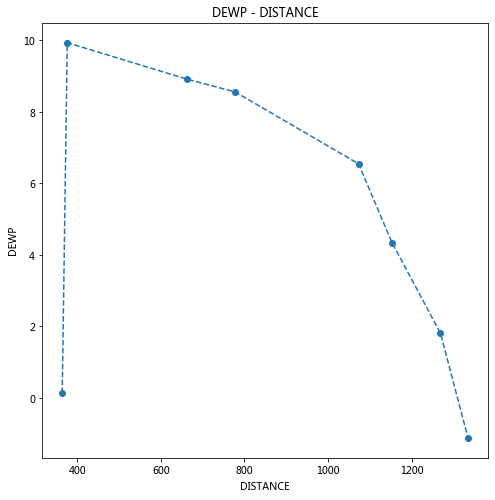

In [22]:
data2 = data.groupby('DISTANCE')['DEWP'].mean()
plt.figure()
plt.title('DEWP - DISTANCE')
plt.xlabel('DISTANCE')
plt.ylabel('DEWP')
plt.plot(data2, linestyle='dashed', marker='o')

发现除了离海洋距离最近的LAS VEGAS的平均露点发生偏低的现象，平均露点和距离呈严格的负线性相关

接着用箱形图进行可视化

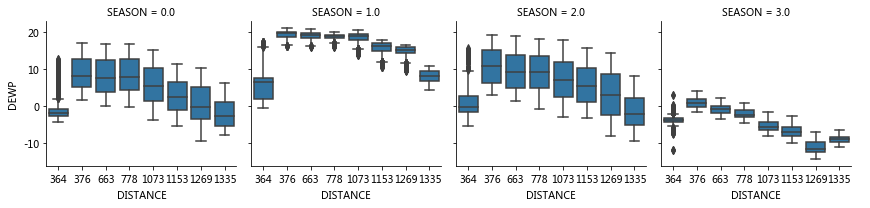

In [23]:
grid = sns.FacetGrid(data, col='SEASON')
grid.map(sns.boxplot, 'DISTANCE', 'DEWP')
grid.add_legend()

再用折线图进行可视化

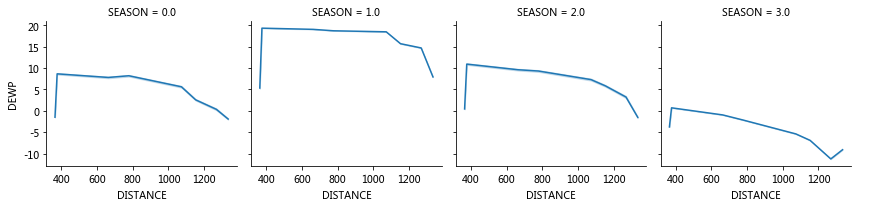

In [24]:
grid = sns.FacetGrid(data, col='SEASON')
grid.map(sns.lineplot, 'DISTANCE', 'DEWP')
grid.add_legend()

开始分析每个城市的风速和风向的分布情况

先观察一下风速的整体分布

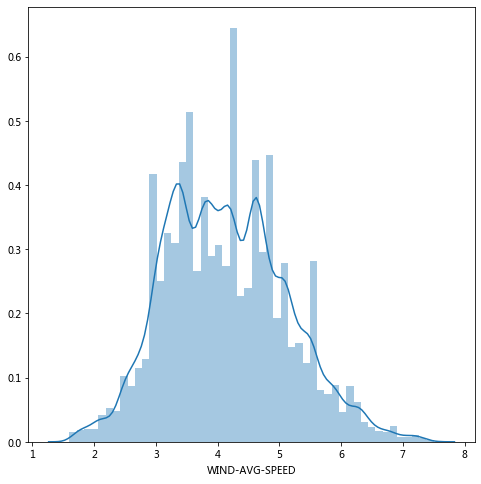

In [25]:
sns.distplot(data['WIND-AVG-SPEED'])

发现平均风速的分布呈正态分布

In [26]:
slice1 = data[['CITY', 'WIND-AVG-SPEED', 'WIND-DIRECTION']]
slice1

,CITY,WIND-AVG-SPEED,WIND-DIRECTION
DATE,,,
2010-01-01 01:00:00,MINNEAPOLIS,4.1,278.0
2010-01-01 02:00:00,MINNEAPOLIS,4.1,287.0
2010-01-01 03:00:00,MINNEAPOLIS,4.0,292.0
2010-01-01 04:00:00,MINNEAPOLIS,4.0,288.0
2010-01-01 05:00:00,MINNEAPOLIS,4.0,289.0
...,...,...,...
2010-12-31 19:00:00,CHICAGO,4.8,255.0
2010-12-31 20:00:00,CHICAGO,4.8,254.0
2010-12-31 21:00:00,CHICAGO,4.8,255.0


使用windrose包可视化每个城市风速和风向的关系

<Figure size 720x720 with 0 Axes>

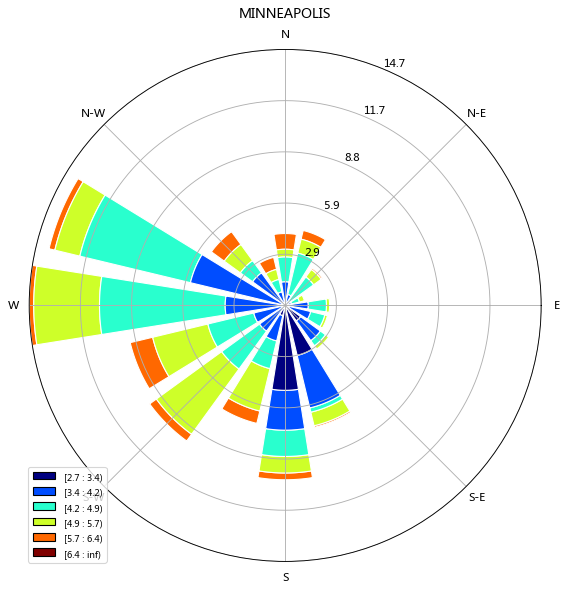

<Figure size 720x720 with 0 Axes>

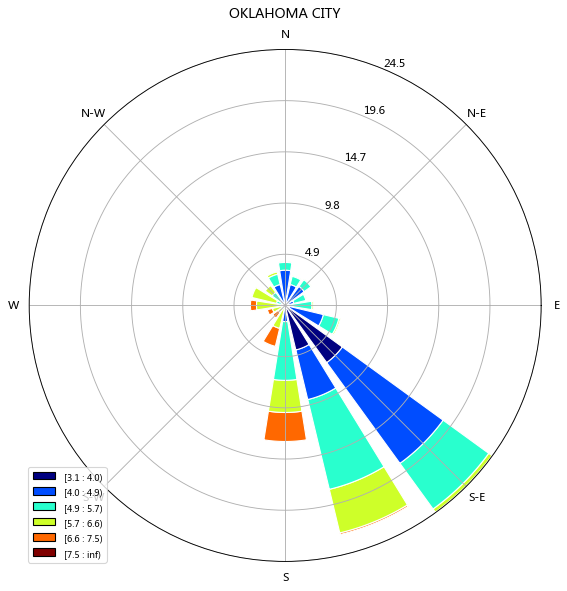

<Figure size 720x720 with 0 Axes>

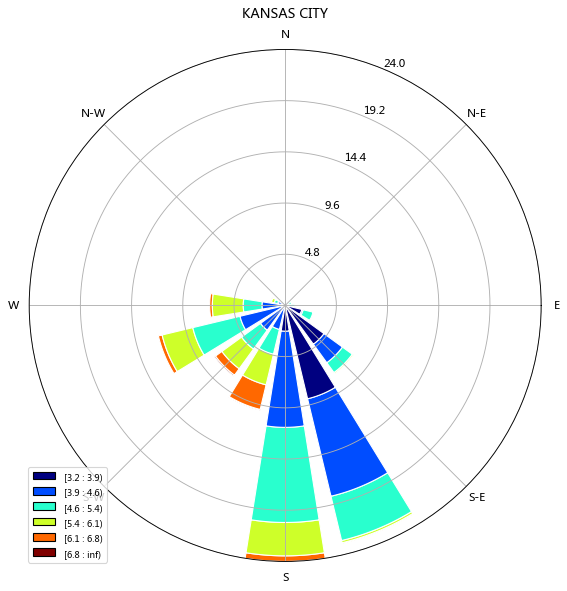

<Figure size 720x720 with 0 Axes>

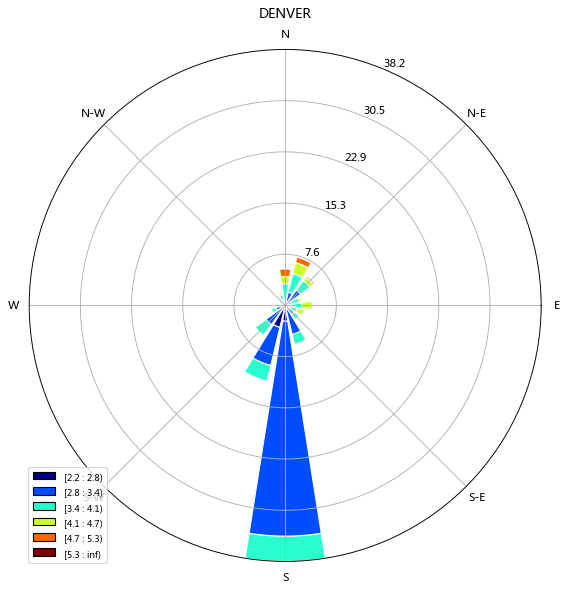

<Figure size 720x720 with 0 Axes>

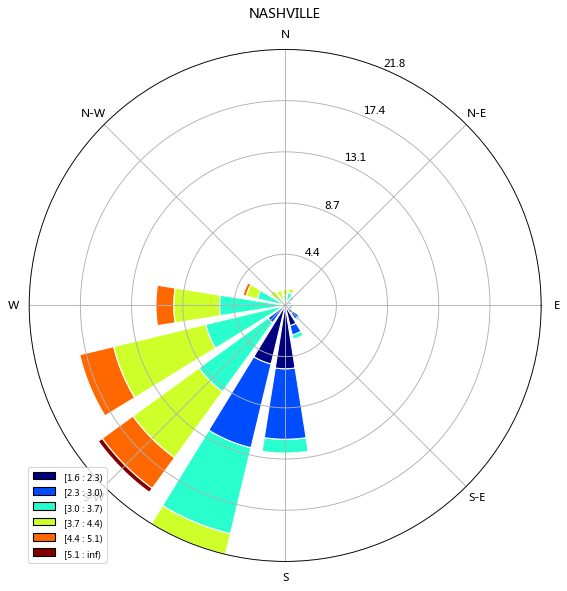

<Figure size 720x720 with 0 Axes>

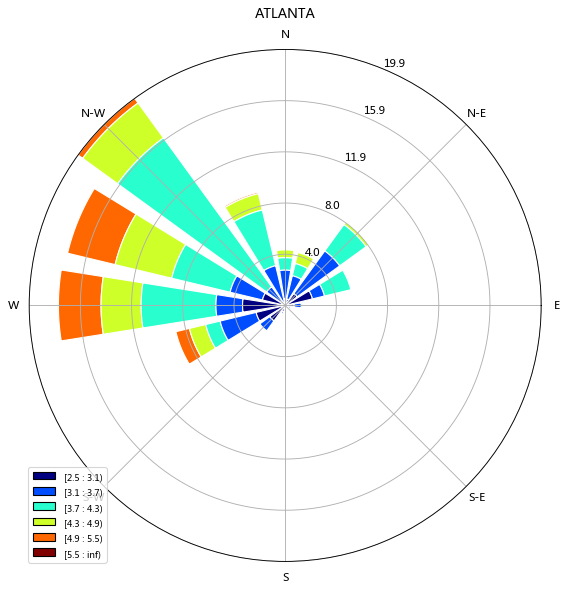

<Figure size 720x720 with 0 Axes>

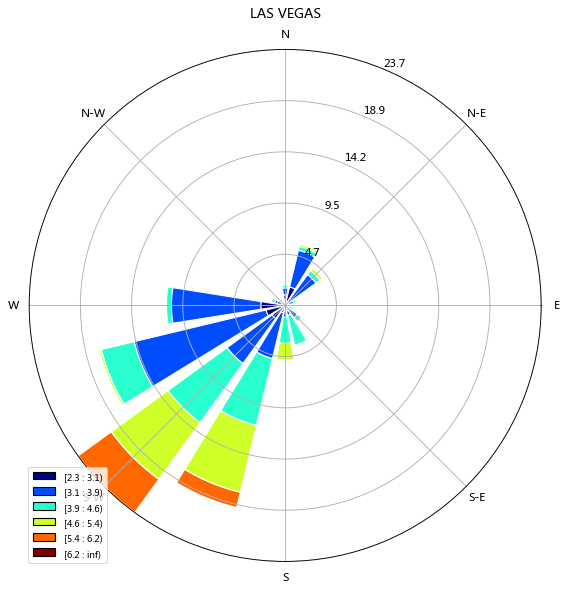

<Figure size 720x720 with 0 Axes>

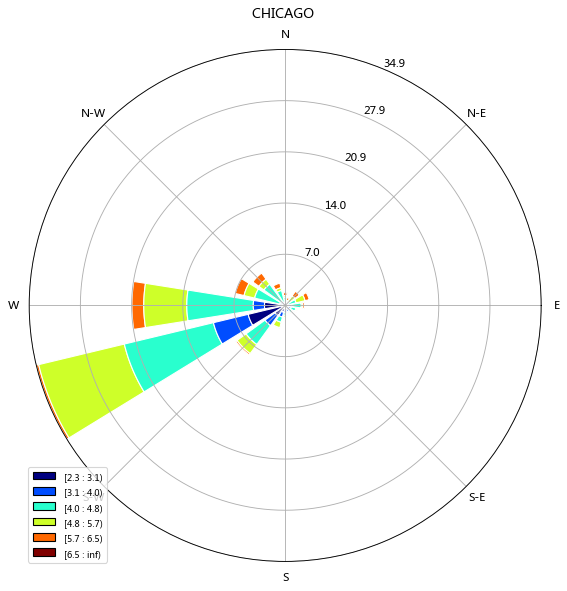

In [27]:
for city in slice1['CITY'].unique():
    piece = slice1[slice1['CITY'] == city]
    ws = piece['WIND-AVG-SPEED']
    wd = piece['WIND-DIRECTION']
    plt.figure(figsize=(10, 10))
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(city)     
    plt.show()

发现每个城市的风速和风向还是有确定的关系，分析后猜测应该是每个城市与海洋的位置关系不同，导致不同方向风速不同
举个例子，比如CHICAGO这个城市西偏南这个方向的风速很大，所以猜测海洋位于该城市的西偏南方向，根据地理知识，由于海洋和陆地的比热容不同，导致海洋和陆地产生温差，温度不同气压就不同，所以会形成海陆风。即平均风速大的风向就是海洋位于该城市的方向

开始分析气温和气压的关系

先观察二者的整体分布

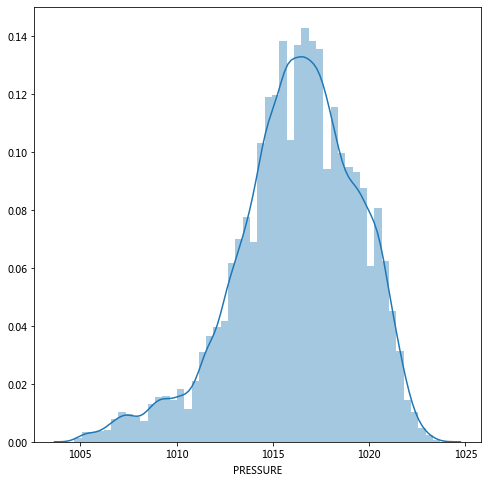

In [28]:
sns.distplot(data['PRESSURE'])

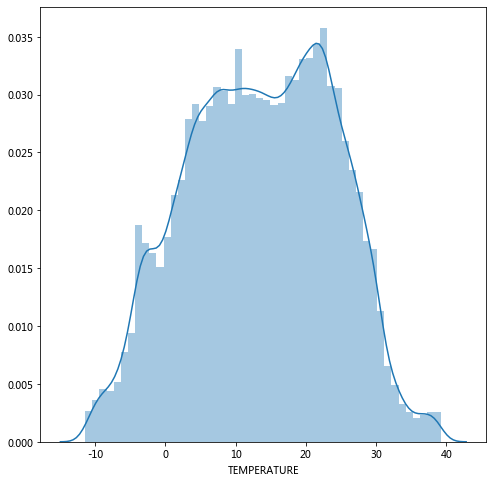

In [29]:
sns.distplot(data['TEMPERATURE'])

发现温度和压强都比较符合正态分布

整体观察一下温度和压强的关系，并直线拟合一条回归曲线

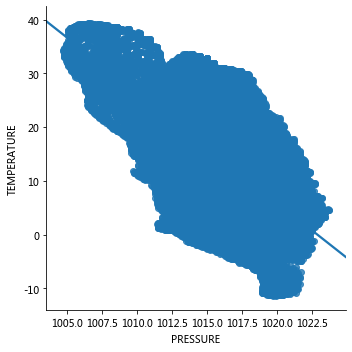

In [30]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', data=data)

可视化后，温度和气压大致呈负线性相关关系，但观察发现数据太多揉在一起了，得想办法减少一些数据，让关系更加清晰

于是想到以天为时间间隔取温度和气压的均值

In [31]:
data_day = data.resample('D')[['PRESSURE', 'TEMPERATURE', 'SEASON']].mean()
data_day

,PRESSURE,TEMPERATURE,SEASON
DATE,,,
2010-01-01,1020.014130,1.059239,3.0
2010-01-02,1019.940104,1.012500,3.0
2010-01-03,1019.981250,1.015625,3.0
2010-01-04,1020.023438,0.965104,3.0
2010-01-05,1020.123958,0.970313,3.0
...,...,...,...
2010-12-27,1020.156771,0.781771,3.0
2010-12-28,1020.211979,0.789062,3.0
2010-12-29,1020.196354,0.817188,3.0


发现数据减少到365行，进行可视化

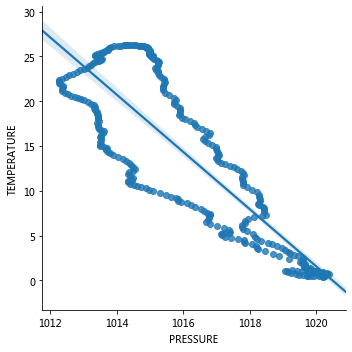

In [32]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', data=data_day)

数据规模减小后，温度和气压的关系更加清晰了，发现大致呈两条直线，猜测可能是不同季节温度的范围不同导致数据分开，所以分别可视化四个季节

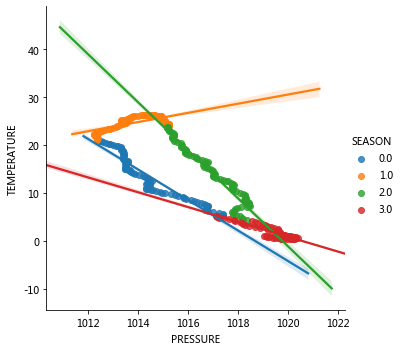

In [33]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', hue='SEASON', data=data_day)

发现除了夏季有反常的情况， 春夏秋三季温度和气压都呈明显的负线性相关关系

猜测原因可能是夏季的季风较大，海陆风影响了温度和气压的负线性相关关系

又考虑到每天昼夜温差较大，可能用每天的平均温度的方法约减数据量导致数据不能反映真实情况，所以考虑缩短时间间隔

缩短时间间隔为6个小时

In [34]:
data_6h = data.resample('6h')[['PRESSURE', 'TEMPERATURE', 'SEASON']].mean()
data_6h

,PRESSURE,TEMPERATURE,SEASON
DATE,,,
2010-01-01 00:00:00,1019.842500,-1.047500,3.0
2010-01-01 06:00:00,1020.854167,-0.227083,3.0
2010-01-01 12:00:00,1019.306250,4.104167,3.0
2010-01-01 18:00:00,1020.025000,1.056250,3.0
2010-01-02 00:00:00,1019.739583,-1.127083,3.0
...,...,...,...
2010-12-30 18:00:00,1020.193750,0.897917,3.0
2010-12-31 00:00:00,1019.935417,-1.177083,3.0
2010-12-31 06:00:00,1020.970833,-0.320833,3.0


以6h为时间间隔进行可视化

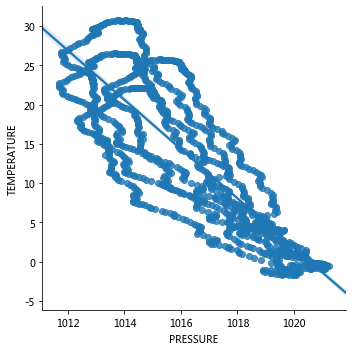

In [35]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', data=data_6h)

观察后发现虽然数据量增加了，点数增多了，但温度和气压仍大致呈负线性相关关系。

发现数据比较清晰的分成了大致八条直线的形状，猜测每个城市由于和海洋的距离不同导致每个城市的温度-气压曲线分开

分别可视化四个季节的情况

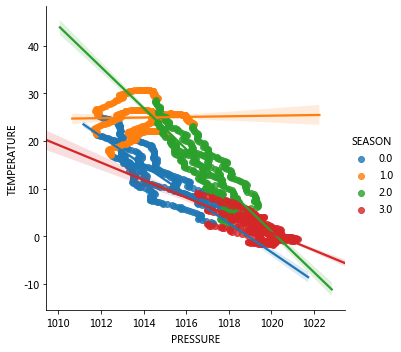

In [36]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', hue='SEASON', data=data_6h)

发现温度和气压大致成负线性相关，结论不变

最后取三个小时为时间间隔约减数据

In [37]:
data_3h = data.resample('3h')[['PRESSURE', 'TEMPERATURE', 'SEASON']].mean()
data_3h

,PRESSURE,TEMPERATURE,SEASON
DATE,,,
2010-01-01 00:00:00,1019.812500,-0.725000,3.0
2010-01-01 03:00:00,1019.862500,-1.262500,3.0
2010-01-01 06:00:00,1020.470833,-1.566667,3.0
2010-01-01 09:00:00,1021.237500,1.112500,3.0
2010-01-01 12:00:00,1019.508333,4.075000,3.0
...,...,...,...
2010-12-31 09:00:00,1021.350000,1.000000,3.0
2010-12-31 12:00:00,1019.641667,3.925000,3.0
2010-12-31 15:00:00,1019.220833,3.979167,3.0


进行可视化

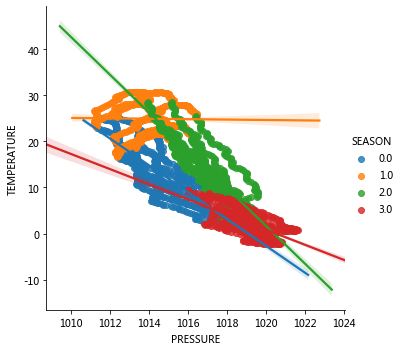

In [38]:
sns.lmplot(x='PRESSURE', y='TEMPERATURE', hue='SEASON', data=data_3h)

结论依然成立